In [11]:
import numpy as np
import torch
from torch_geometric.data import Data
from torch_geometric.transforms import NormalizeFeatures
from torch_geometric.nn import GCNConv
import torch.nn.functional as F

# Load data from .npz file
data_npz = np.load('C:\\Users\\nisha\\Downloads\\redditdata\\reddit_data.npz')
x = data_npz['feature']  # node features
y = data_npz['label']    # node labels

# Choose a subset of the data
subset_size = 1000  # Change this to the desired subset size
x_subset = x[:subset_size]
y_subset = y[:subset_size]

In [12]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load data from .npz file
data = data_npz
x = data_npz['feature']  # node features
y = data_npz['label']    # node labels

# Choose a subset of the data
subset_size = 1000  # Change this to the desired subset size
x_subset = x[:subset_size]
y_subset = y[:subset_size]

# Split data into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x_subset, y_subset, test_size=0.2, random_state=42)

# Initialize and train the SVM classifier
clf = SVC(kernel='linear', random_state=42)
clf.fit(x_train, y_train)

# Predict on the test set
y_pred = clf.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("SVM Test Accuracy:", accuracy)


SVM Test Accuracy: 0.425


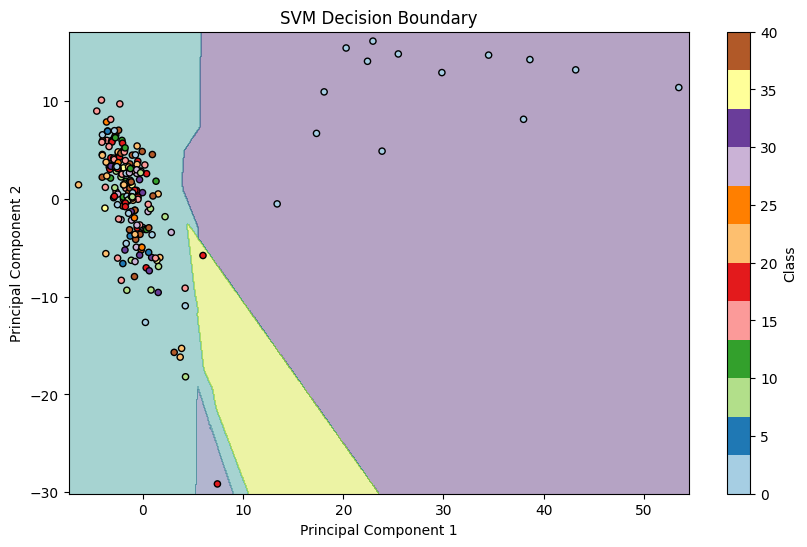

In [13]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Apply PCA to reduce the dimensionality of the data for visualization
pca = PCA(n_components=2)
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Fit SVM classifier on the reduced data
clf.fit(x_train_pca, y_train)

# Plot decision boundary
plt.figure(figsize=(10, 6))

# Plot decision regions
x_min, x_max = x_test_pca[:, 0].min() - 1, x_test_pca[:, 0].max() + 1
y_min, y_max = x_test_pca[:, 1].min() - 1, x_test_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),
                     np.arange(y_min, y_max, 0.1))

Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, alpha=0.4)

# Plot test data points
plt.scatter(x_test_pca[:, 0], x_test_pca[:, 1], c=y_test, s=20, edgecolor='k', cmap=plt.cm.Paired)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('SVM Decision Boundary')
plt.colorbar(label='Class')
plt.show()


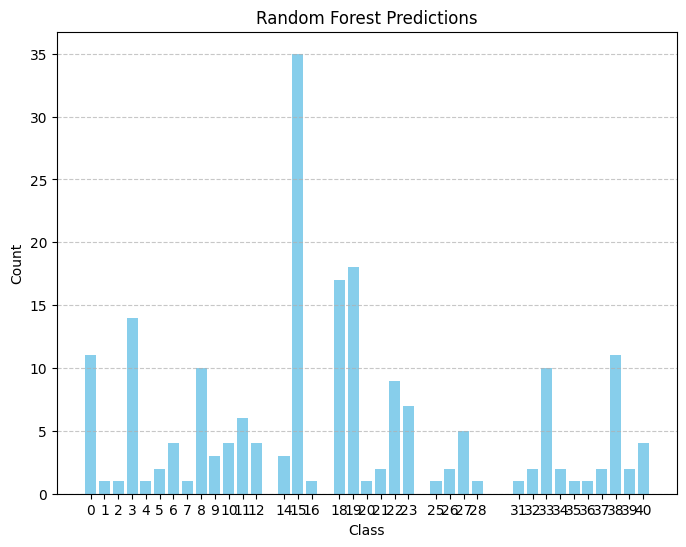

In [17]:
import matplotlib.pyplot as plt

# Calculate class counts
unique_classes, class_counts = np.unique(y_pred, return_counts=True)

# Plot bar graph
plt.figure(figsize=(8, 6))
plt.bar(unique_classes, class_counts, color='skyblue')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Random Forest Predictions')
plt.xticks(unique_classes)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


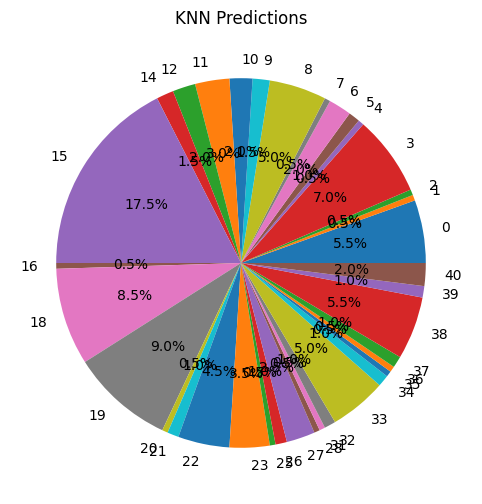

In [20]:
import matplotlib.pyplot as plt

# Calculate class counts
unique_classes, class_counts = np.unique(y_pred, return_counts=True)

# Plot pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts, labels=unique_classes, autopct='%1.1f%%', colors=plt.cm.tab10.colors)
plt.title('KNN Predictions')
plt.show()
